In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [252]:
df = pd.read_csv('/Users/vladimiregorov/Downloads/Mall_Customers 2.csv')

In [253]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [202]:
df.head(6)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,1
1,1,21,15,81,3
2,0,20,16,6,1
3,0,23,16,77,3
4,0,31,17,40,1
5,0,22,17,76,3


In [240]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

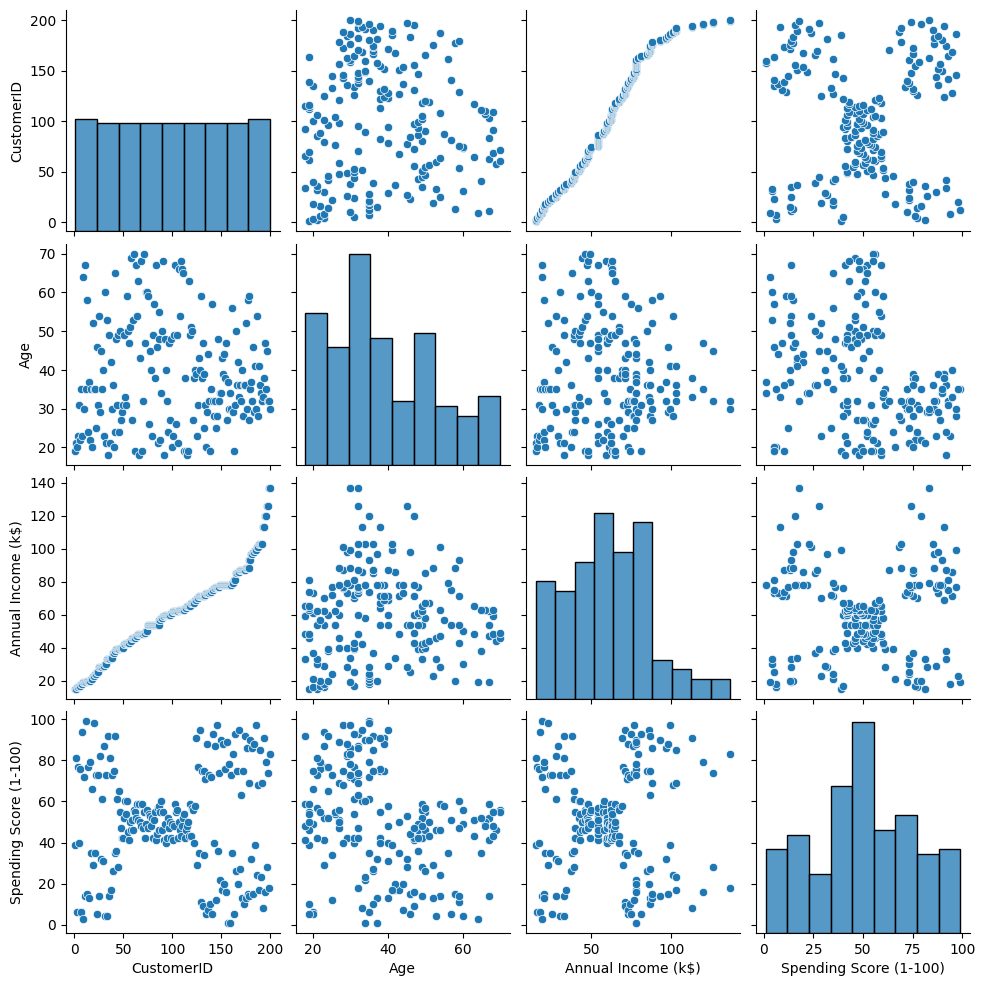

In [112]:
sns.pairplot(df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']])

In [254]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0 )
df = df.drop(columns=('CustomerID'))

In [255]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [243]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [256]:
inertion = []

k = [1,2,3,4,5,6,7,8]


for i in k:
    Kmean = KMeans(n_clusters = i  ,random_state= 111)
    Kmean.fit(df)
    inertion.append(Kmean.inertia_)

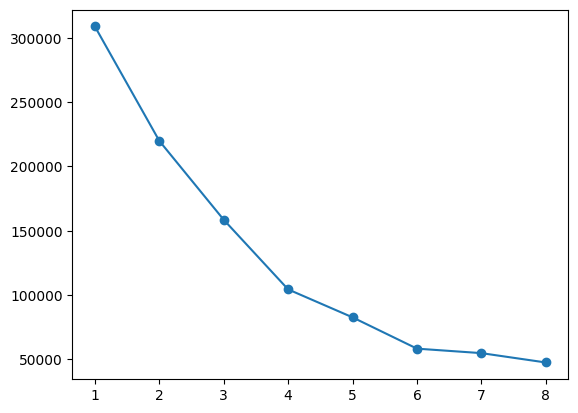

In [257]:
plt.plot(k, inertion, marker='o')

In [258]:
result = []

k = [2,3,4,5,6,7,8]


for i in k:
    Kmean = KMeans(n_clusters = i, random_state = 13)
    df['Cluster'] = Kmean.fit_predict(df)
    result.append(silhouette_score(df, df['Cluster']))

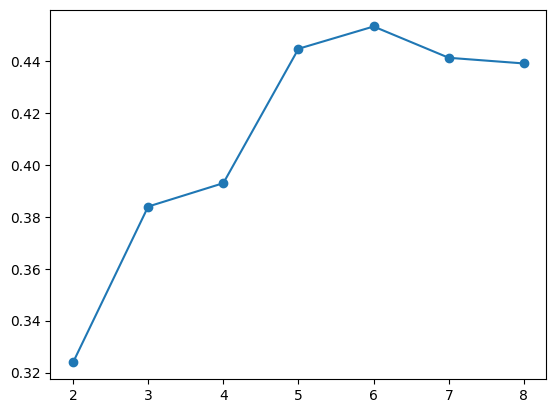

In [259]:
plt.plot(k, result, marker='o')

In [260]:
Scaler = StandardScaler()
X_Sca = Scaler.fit_transform(df)

In [261]:
Kmean = KMeans(n_clusters = 6, random_state=42)
df['Cluster'] = Kmean.fit_predict(X_Sca)

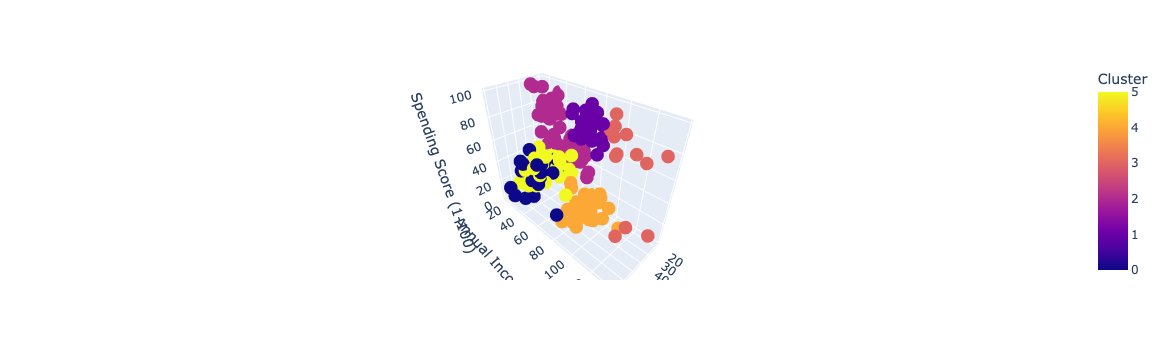

In [262]:
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Cluster')
fig.show()

In [263]:
df1 = pd.read_csv('/Users/vladimiregorov/Downloads/Mall_Customers 2.csv')
df1.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [264]:
df1['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [265]:
df1['Gender'] = df1['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [266]:
df1 = df1.drop(columns = ('CustomerID'))

In [267]:
df1.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81


In [269]:
Kmean = KMeans(n_clusters=6, random_state = 45)
df1['Cluster'] = Kmean.fit_predict(df1)

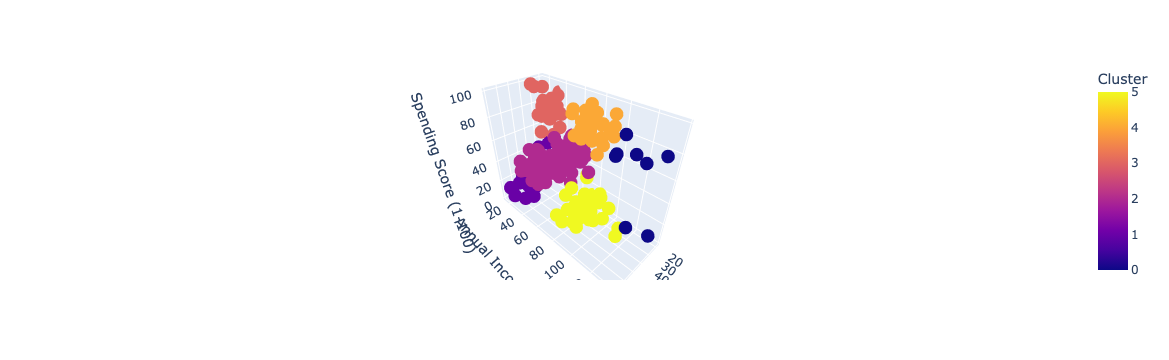

In [270]:
fig = px.scatter_3d(df1, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Cluster')
fig.show()

In [274]:
print(f"metric for df: {silhouette_score(df, df['Cluster'])}")
print(f"metric for df1: {silhouette_score(df1, df1['Cluster'])}")

metric for df: 0.2346202593660819
metric for df1: 0.4302064053790371
